# Prueba de modelo en C++

Este cuaderno contiene un gráfico del archivo `.csv` generado por el [ejemplo de simulación de motor en C++](./cpp).

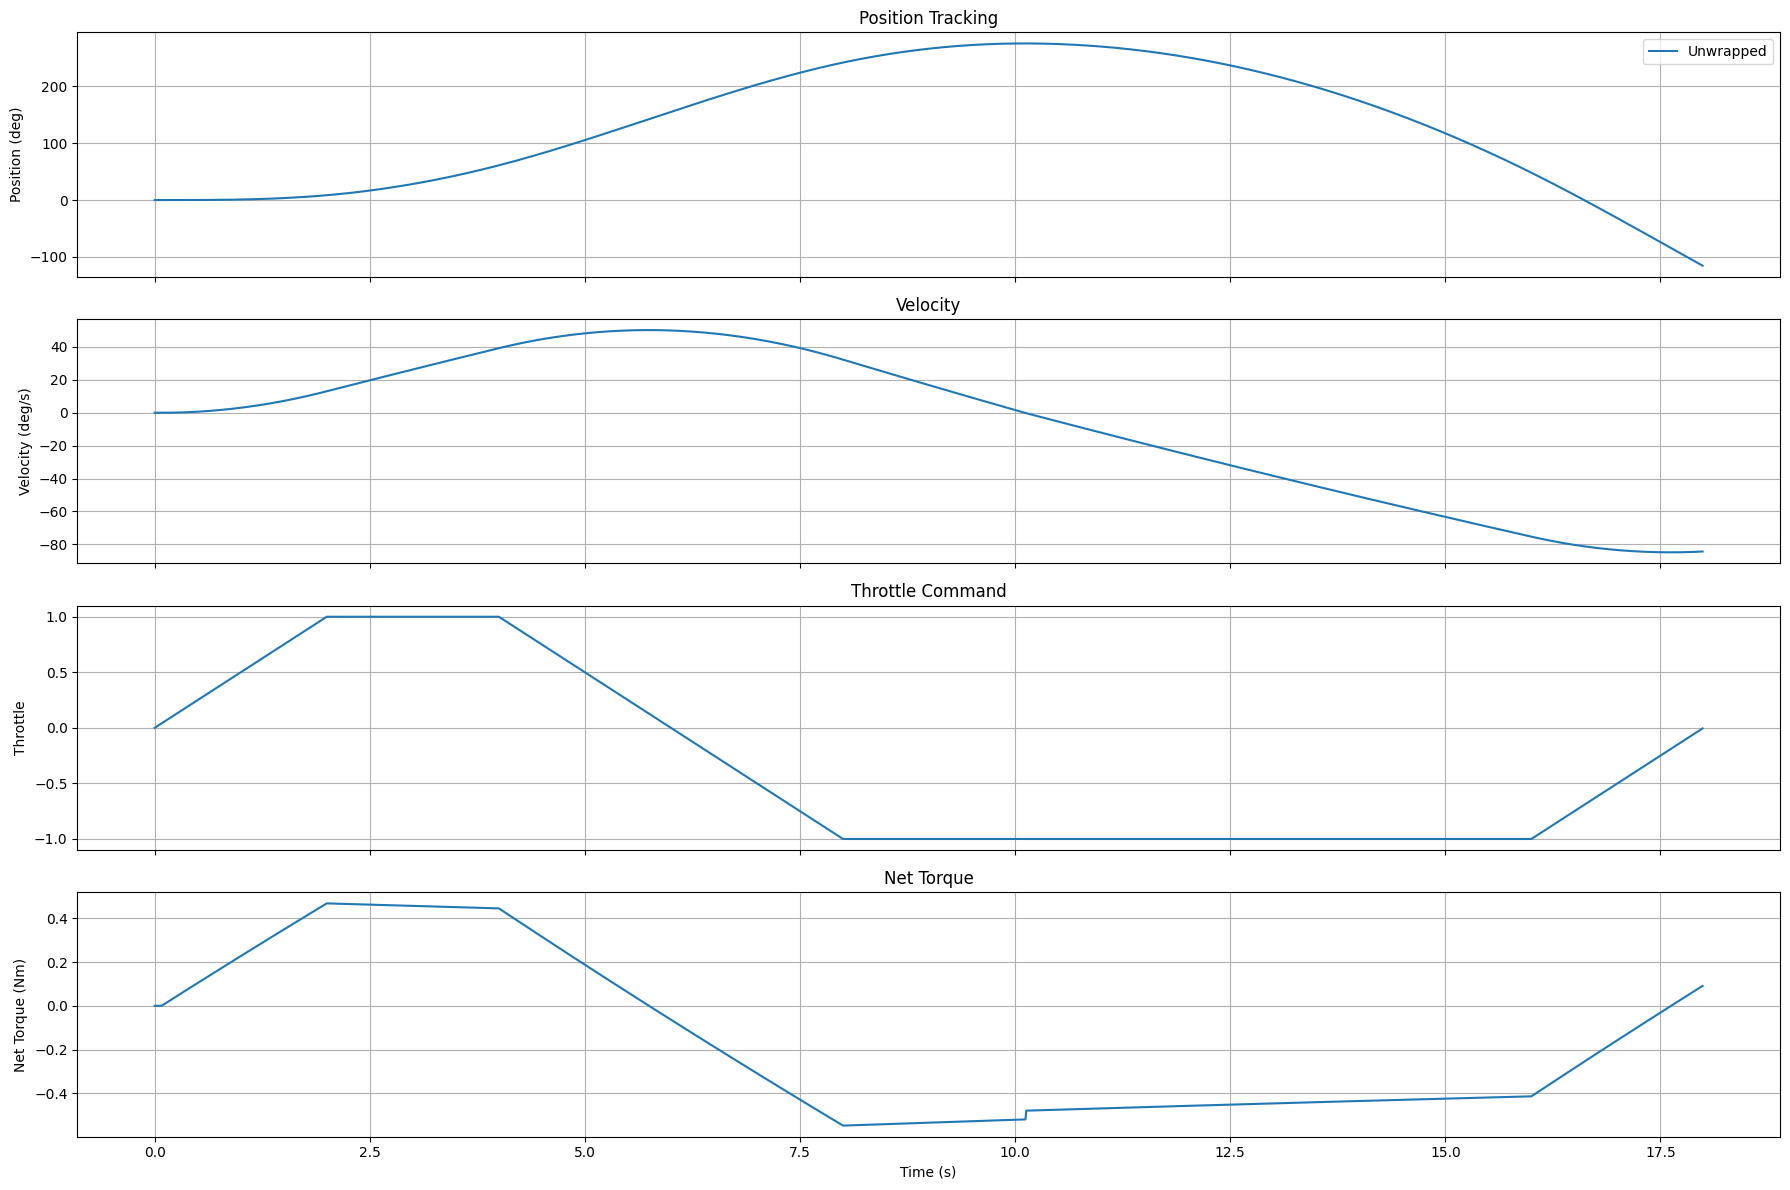

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MOTOR_LOG_CSV_FILENAME="cpp/build/motor_log.csv"

df = pd.read_csv(MOTOR_LOG_CSV_FILENAME)
wrapped_deg = df["position_deg"].values
unwrapped_rad = np.unwrap(np.deg2rad(wrapped_deg))
unwrapped_deg = np.rad2deg(unwrapped_rad)

df["position_unwrapped_deg"] = unwrapped_deg

# Crear figura con 4 subplots verticales
fig, axes = plt.subplots(4, 1, figsize=(18, 12), sharex=True)

# Posición envuelta vs unwrapped
#axes[0].plot(df["time"], df["position_deg"], label="Wrapped")
axes[0].plot(df["time"], df["position_unwrapped_deg"], label="Unwrapped")
axes[0].set_ylabel("Position (deg)")
axes[0].set_title("Position Tracking")
axes[0].legend()
axes[0].grid(True)

# Velocidad
axes[1].plot(df["time"], df["velocity_deg_s"])
axes[1].set_ylabel("Velocity (deg/s)")
axes[1].set_title("Velocity")
axes[1].grid(True)

# Throttle
axes[2].plot(df["time"], df["throttle"])
axes[2].set_ylabel("Throttle")
axes[2].set_title("Throttle Command")
axes[2].grid(True)

# Net Torque
axes[3].plot(df["time"], df["net_torque"])
axes[3].set_ylabel("Net Torque (Nm)")
axes[3].set_xlabel("Time (s)")
axes[3].set_title("Net Torque")
axes[3].grid(True)

plt.tight_layout()
plt.show()

